In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Observation
From here we can observe that there r no nulls present

Mean is Approximately equal to Median so we can say that there is no skewness present

It seems that there r little outliers present in age ,bmi,children columns

# Observation
1.There are 1338 rows and 7 columns in the dataset.
2.Out of 7 columns 6 are features i.e age,sex,bmi,region,children,smoker are features and chareges column is our label.
3.Label and bmi have continous data whereas age,children have integer data whereas sex,smoker,region have object data.
So this is our regression problem.

In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Observation
There r no null values present in our dataset

In [11]:
df.duplicated().sum()

1

# Observation
as there is only 1 duplicate it will not make any impact so lets keep it and move ahead

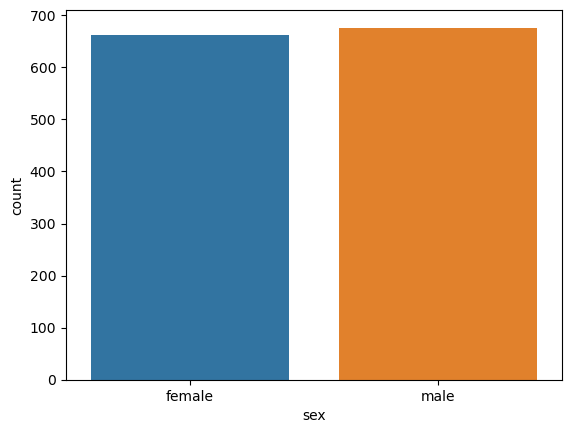

In [12]:
#Lets visualize through graphical analysis
sns.countplot(x='sex',data=df)
plt.show()

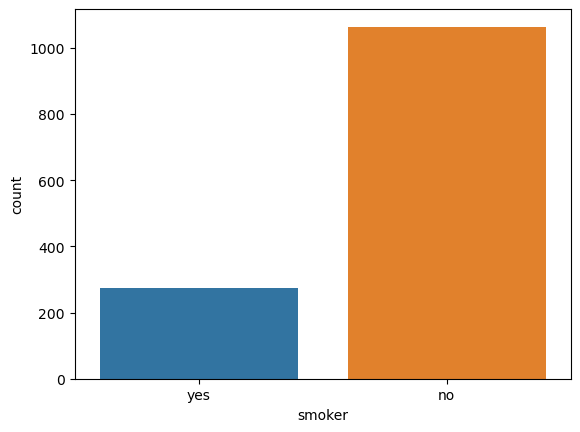

In [13]:
sns.countplot(x='smoker',data=df)
plt.show()

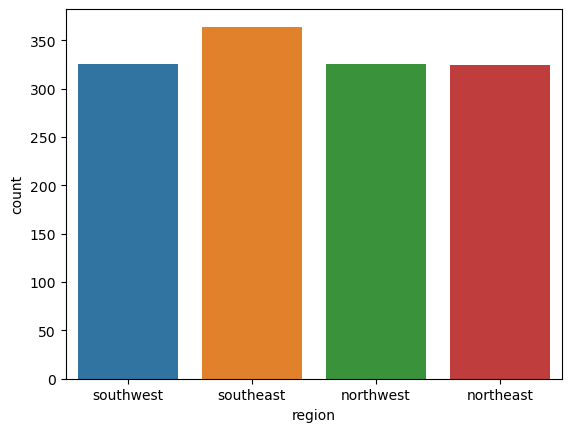

In [14]:
sns.countplot(x='region',data=df)
plt.show()

# Observation
We can observe that in sex column distribution is even

We can see that distribution in smoker column is not even because count smokers is very small in comparison to non smokers

We can see that in region column distribution is also even

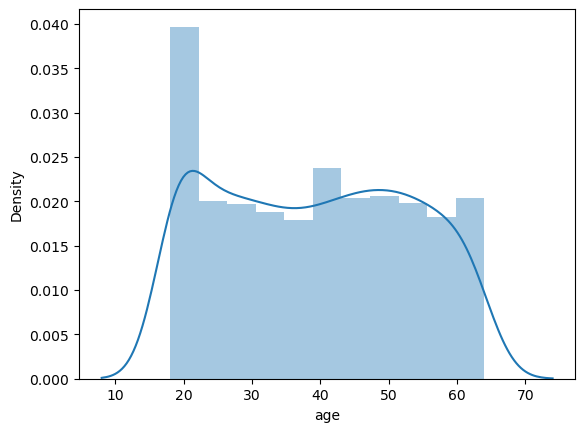

In [15]:
#Now lets check distribution plot
sns.distplot(df['age'])
plt.show()

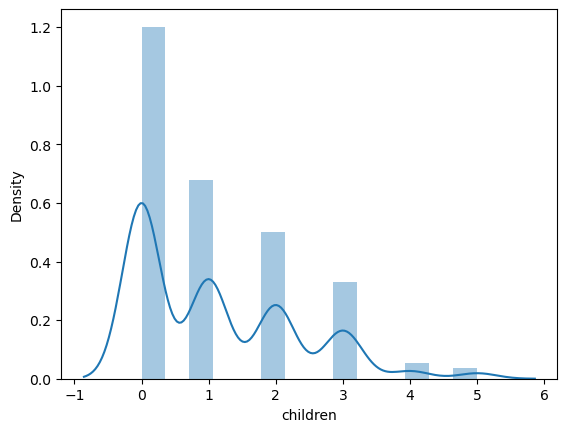

In [16]:
sns.distplot(df['children'])
plt.show()

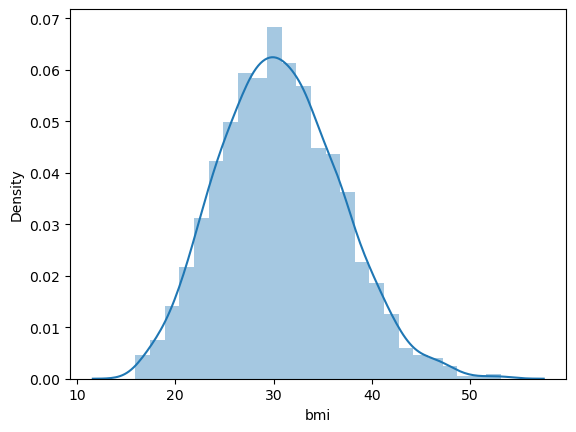

In [17]:
sns.distplot(df['bmi'])
plt.show()

# Observation
We can see that data is normally distributed for age and bmi column where bmi have little right skewness(we will check that)

Children column is approx normally distributed( we will see to it)

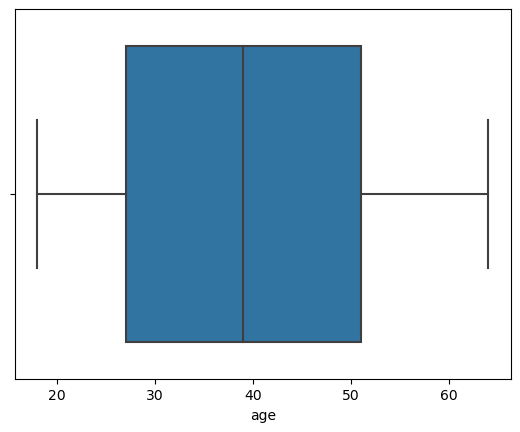

In [18]:
#lets check box plot for outliers
sns.boxplot(df['age'])
plt.show()

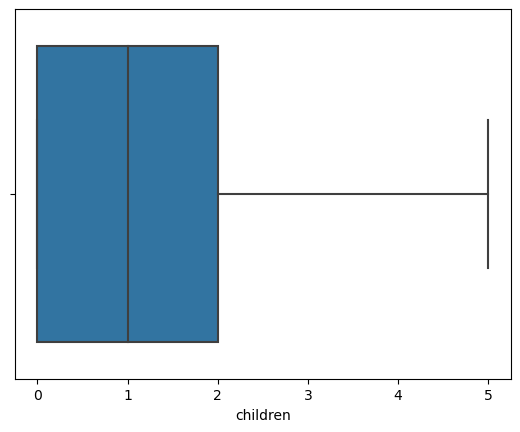

In [19]:
#lets check box plot for outliers
sns.boxplot(df['children'])
plt.show()

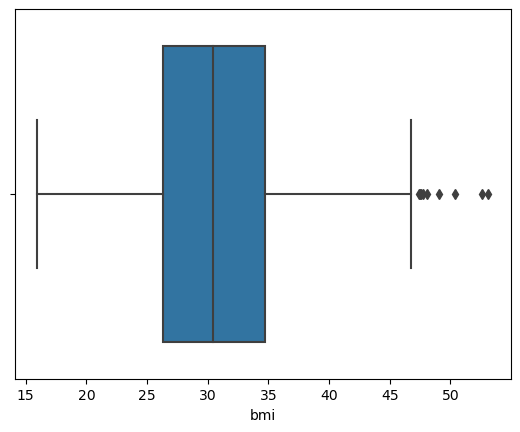

In [20]:
#lets check box plot for outliers
sns.boxplot(df['bmi'])
plt.show()

# Observation
From box plot we can see that there r few outliers in bmi column

In [21]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [22]:
#to remove skewness from children column lets use cbrt method
df['children']=np.cbrt(df['children'])

In [23]:
df['children'].skew()

-0.09711641085823748

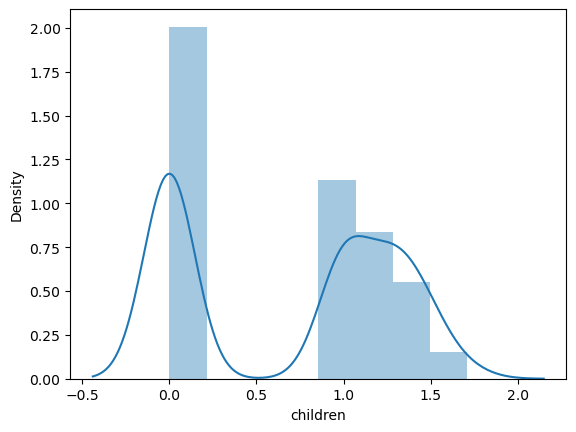

In [24]:
sns.distplot(df['children'])
plt.show()

In [25]:
#now lets remove outliers from bmi column using z-score method
from scipy.stats import zscore 
z=np.abs(zscore(df['bmi']))
z

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [26]:
#threshold=3
np.where(z>3)


(array([ 116,  847, 1047, 1317], dtype=int64),)

In [27]:
z.iloc[1317]

3.685522232281654

In [28]:
#now removing outliers from our data set
df1=df[(z<3)]
df1.shape

(1334, 7)

In [29]:
df=df1
df.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,30.601555,0.690614,13265.622751
std,14.034654,6.000927,0.617894,12089.666548
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4746.521225
50%,39.000000,30.332500,1.000000,9382.033000
75%,51.000000,34.595000,1.259921,16639.912515
max,64.000000,48.070000,1.709976,63770.428010


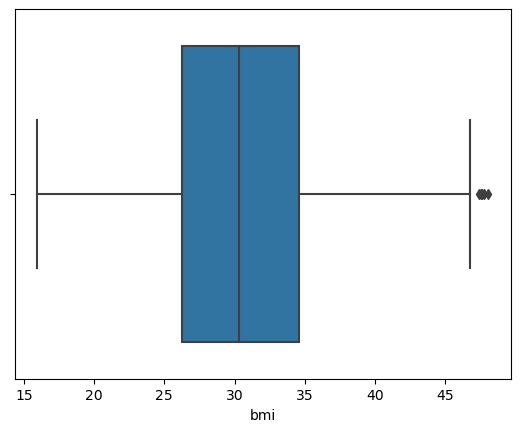

In [30]:
#lets check box plot for outliers
sns.boxplot(df['bmi'])
plt.show()

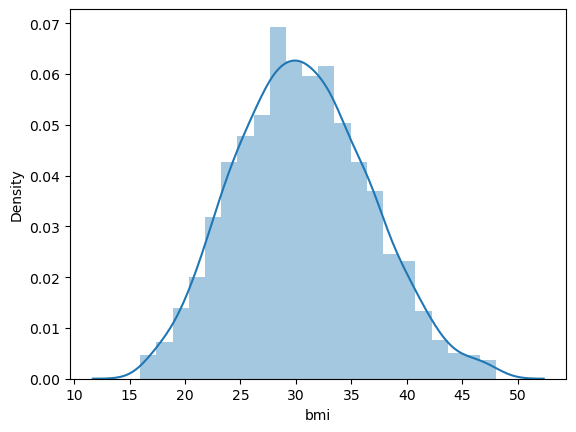

In [31]:
sns.distplot(df['bmi'])
plt.show()

# Observation
Till now we have removed skewness from children column and removed outliers from bmi column.

our data is normally distributed

Now lets check for multicollinearity issue

In [32]:
!pip install category_encoders

In [33]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [34]:
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

In [35]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,0.503748,30.601555,0.690614,0.204648,1.514243,13265.622751
std,14.034654,0.500173,6.000927,0.617894,0.403595,1.106222,12089.666548
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.237500,0.000000,0.000000,1.000000,4746.521225
50%,39.000000,1.000000,30.332500,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.595000,1.259921,0.000000,2.000000,16639.912515
max,64.000000,1.000000,48.070000,1.709976,1.000000,3.000000,63770.428010


In [36]:
#Now lets chech multicollinearity issue
corr=df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.049851,-0.023820,0.002974,0.301360
sex,-0.019041,1.000000,0.037031,0.017140,0.076096,0.003293,0.057165
bmi,0.118887,0.037031,1.000000,0.019930,0.002264,0.155877,0.200799
children,0.049851,0.017140,0.019930,1.000000,0.010463,0.014558,0.071465
smoker,-0.023820,0.076096,0.002264,0.010463,1.000000,-0.002333,0.786536
region,0.002974,0.003293,0.155877,0.014558,-0.002333,1.000000,-0.006404
charges,0.301360,0.057165,0.200799,0.071465,0.786536,-0.006404,1.000000


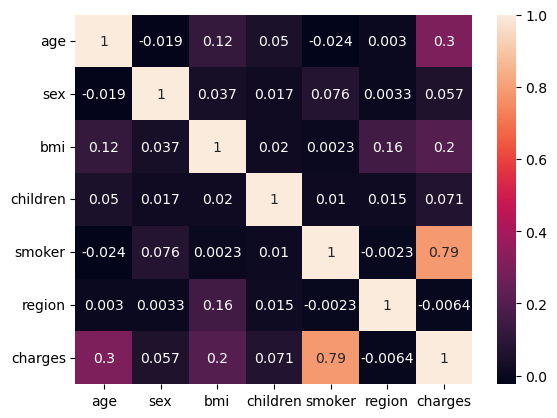

In [37]:
#Let's plot heatmap for visualisation purpose
sns.heatmap(corr,annot=True)
plt.show()

# Obervation
All features except region have positive corelation with our target variable whereas region have negative correlation with our target variable.

Smoker column have strong positive relation with our target variable.

Region column have very less corelation with our target variable and we can drop it if necessary.

Rest all features are somehow related to each other


In [38]:
#Let's separate features and labels
X=df.drop(columns=['charges'])
y=df['charges']

In [39]:
#Let's standarize our data
from sklearn.preprocessing import StandardScaler

In [40]:
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,age,sex,bmi,children,smoker,region
0,-1.442249,-1.007525,-0.450359,-1.118109,1.971407,1.343594
1,-1.513528,0.992532,0.528191,0.500899,-0.507252,0.439278
2,-0.800739,0.992532,0.399829,1.216904,-0.507252,0.439278
3,-0.444344,0.992532,-1.316383,-1.118109,-0.507252,-0.465038
4,-0.515623,0.992532,-0.286989,-1.118109,-0.507252,-0.465038
...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.216904,-0.507252,-0.465038
1330,-1.513528,-1.007525,0.219789,-1.118109,-0.507252,-1.369355
1331,-1.513528,-1.007525,1.041637,-1.118109,-0.507252,0.439278
1332,-1.299692,-1.007525,-0.800436,-1.118109,-0.507252,1.343594


# Observation
Till now we have separated features and labels

our data is standarized

Now lets check for multicollinearity problem using vif

In [41]:
#checking multicollinerity problem using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range (X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.018089,age
1,1.007973,sex
2,1.041617,bmi
3,1.003263,children
4,1.006452,smoker
5,1.025337,region


# Observation
VIF value for all features is below 5 it means there is no multicoliinearity problem 

Dataset is small but let's see what happens after applying feature selection method

let's use kbest feature selection technique


In [43]:
from sklearn.feature_selection import SelectKBest,f_classif

In [44]:
best=SelectKBest(score_func=f_classif,k=4)
fit=best.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature=pd.concat([df_columns,df_scores],axis=1)
feature.columns=['feat_name','Score']
print(feature.nlargest(4,'Score'))

  feat_name  Score
0       age    inf
1       sex    inf
2       bmi    inf
3  children    inf


# Observation
As it is showing score as  infinite ,we will have to deal with it but dataset is small so we will not delete any column

Let's begin our modelling part

# Modelling

In [48]:
#lets import neccesary lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [68]:
#creating training and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=22)

In [50]:
#importing important metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [69]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y1=reg.predict(x_test)
print('R2 score is :',r2_score(y_test,y1))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.7672309570953155
Mean Absolute Error is : 4382.240777521327
Mean Squared Error is : 37513939.70530592
Root Mean Squared Error is : 6124.862423377845


In [71]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y2=knn.predict(x_test)
print('R2 score is :',r2_score(y_test,y2))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.8358539134684275
Mean Absolute Error is : 3205.279945752096
Mean Squared Error is : 26454404.400884423
Root Mean Squared Error is : 5143.384527806998


In [72]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y3=tree.predict(x_test)
print('R2 score is :',r2_score(y_test,y3))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : 0.7513837937724328
Mean Absolute Error is : 2992.0520043532933
Mean Squared Error is : 40067928.508869424
Root Mean Squared Error is : 6329.923262478735


In [73]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)
y4=bag.predict(x_test)
print('R2 score is :',r2_score(y_test,y4))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.8536534928193095
Mean Absolute Error is : 2758.9443098880242
Mean Squared Error is : 23585756.842702806
Root Mean Squared Error is : 4856.516945579703


In [74]:
rand=RandomForestRegressor()
rand.fit(x_train,y_train)
y5=rand.predict(x_test)
print('R2 score is :',r2_score(y_test,y5))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.8692176658812014
Mean Absolute Error is : 2565.743267094086
Mean Squared Error is : 21077375.82037824
Root Mean Squared Error is : 4591.010326755782


In [75]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y6=ada.predict(x_test)
print('R2 score is :',r2_score(y_test,y6))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y6))
print('Mean Squared Error is :',mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y6)))

R2 score is : 0.8402052434305805
Mean Absolute Error is : 4030.4607114022415
Mean Squared Error is : 25753127.599634953
Root Mean Squared Error is : 5074.753944738104


In [76]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
y7=grad.predict(x_test)
print('R2 score is :',r2_score(y_test,y7))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y7))
print('Mean Squared Error is :',mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y7)))

R2 score is : 0.8761424035235579
Mean Absolute Error is : 2489.124416547319
Mean Squared Error is : 19961358.900135133
Root Mean Squared Error is : 4467.813659961115


In [77]:
svr=SVR()
svr.fit(x_train,y_train)
y8=svr.predict(x_test)
print('R2 score is :',r2_score(y_test,y8))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y8))
print('Mean Squared Error is :',mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y8)))

R2 score is : -0.10976586247594233
Mean Absolute Error is : 8425.685917216997
Mean Squared Error is : 178854065.52527213
Root Mean Squared Error is : 13373.633220829413


In [78]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y9=xgb.predict(x_test)
print('R2 score is :',r2_score(y_test,y9))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y9))
print('Mean Squared Error is :',mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y9)))

R2 score is : 0.8539378780781408
Mean Absolute Error is : 2749.5058903106283
Mean Squared Error is : 23539924.23833347
Root Mean Squared Error is : 4851.79598069967


In [80]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
alpha

4.4333816514485465

In [81]:
lasso=Lasso(alpha)
lasso.fit(x_train,y_train)
y10=lasso.predict(x_test)
print('R2 score is :',r2_score(y_test,y10))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y10))
print('Mean Squared Error is :',mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y10)))

R2 score is : 0.7671750801337722
Mean Absolute Error is : 4381.589270931234
Mean Squared Error is : 37522945.0478553
Root Mean Squared Error is : 6125.5975257810815


In [82]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y11=ridge.predict(x_test)
print('R2 score is :',r2_score(y_test,y11))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y11))
print('Mean Squared Error is :',mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y11)))

R2 score is : 0.7671176819846364
Mean Absolute Error is : 4383.5283829359205
Mean Squared Error is : 37532195.55075298
Root Mean Squared Error is : 6126.35254868286


# Observation
as per the metrics our gradientboostingregressor model is working best

but lets check for cross validation score to avoid overfitting

In [83]:
#importing cross val score
from sklearn.model_selection import cross_val_score

In [85]:
score1=cross_val_score(reg,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y1)-score1.mean())*100)

Difference of r2_score and cross vald score is : 2.0501846489562103


In [86]:
score2=cross_val_score(knn,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y2)-score2.mean())*100)

Difference of r2_score and cross vald score is : 2.804112101408107


In [87]:
score3=cross_val_score(tree,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y3)-score3.mean())*100)

Difference of r2_score and cross vald score is : 3.9785805166264288


In [88]:
score4=cross_val_score(bag,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y4)-score4.mean())*100)

Difference of r2_score and cross vald score is : 3.4398103595908114


In [89]:
score5=cross_val_score(rand,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y5)-score5.mean())*100)

Difference of r2_score and cross vald score is : 3.1530234270374713


In [90]:
score6=cross_val_score(ada,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y6)-score6.mean())*100)

Difference of r2_score and cross vald score is : 2.6681659717116446


In [91]:
score7=cross_val_score(grad,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y7)-score7.mean())*100)

Difference of r2_score and cross vald score is : 2.1790691760947833


In [92]:
score8=cross_val_score(svr,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y8)-score8.mean())*100)

Difference of r2_score and cross vald score is : -0.9708657075690754


In [93]:
score9=cross_val_score(xgb,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y9)-score9.mean())*100)

Difference of r2_score and cross vald score is : 4.2031552502335146


In [94]:
score10=cross_val_score(lasso,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y10)-score10.mean())*100)

Difference of r2_score and cross vald score is : 2.0423870886329687


In [95]:
score11=cross_val_score(ridge,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y11)-score11.mean())*100)

Difference of r2_score and cross vald score is : 2.0382824367348285


# Observation 
based on our score of diffence between r2_score and crossvalscore,our ridge model is performing well.


now lets use hyper parameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param={'alpha':[1,2,.5,.4,3,4,4.5],
       'fit_intercept':[True,False],
      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
       'positive':[True,False],
       'random_state':[1,5,10,20,30,40]
      }
gridsearch=GridSearchCV(estimator=ridge,param_grid=param,cv=5)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'alpha': 4.5,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [98]:
best=gridsearch.best_estimator_
best.fit(x_train,y_train)
y12=best.predict(x_test)
print('R2 score is :',r2_score(y_test,y12))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y12))
print('Mean Squared Error is :',mean_squared_error(y_test,y12))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y12)))

R2 score is : 0.764987107184476
Mean Absolute Error is : 4408.661036271055
Mean Squared Error is : 37875567.04720918
Root Mean Squared Error is : 6154.312881809729


In [99]:
score12=cross_val_score(best,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y12)-score12.mean())*100)

Difference of r2_score and cross vald score is : 1.8669845855568523


# Hence ridge model is our best model after hyper parameter tuning 